In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [20]:
df= pd.read_csv('abalone.csv')

In [21]:
df.shape

(4177, 9)

In [22]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


In [24]:
# Conclusion:
#Total no of Rows in every column is 4177 with no missing values


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [26]:
# Sex is categorical, Nominal
# other features are float

# Rings will predict the age of Abalone so our Target column is Rings

In [27]:
# This is Regression problem

# Analyse Target Variable

In [28]:
df['Rings'].nunique()

28

In [29]:
df.Rings.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [30]:
df.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

# Null Values()

In [31]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

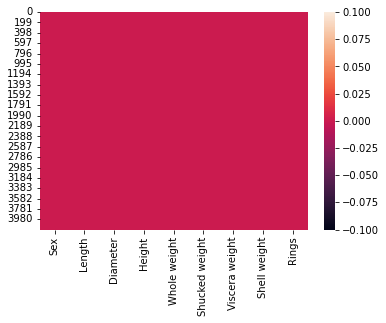

In [32]:
sns.heatmap(df.isnull())

In [33]:
# Conclusion:  No Null Values

# Feature Analysis

In [34]:
# Univarient

In [35]:
integer= df._get_numeric_data()
#int=df.select_dtypes(np.number)

for i in int.columns:
    sns.histplot(int[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.show()

AttributeError: type object 'int' has no attribute 'columns'

In [36]:
# COnclusions:
Length: lil bit left skewed , otherwise looke normal distribution
Diameter: little bit left skewed, otherwise looks Normal distribution
Height: Seems good Normal Distribution
Whole Weight:  Right skewed
Shucked Weight: Right skewed
Viscera Weight: Right skewed
Shell Weight:  Right Skewed
Rings: have normal distribution but right skewed
    

SyntaxError: invalid syntax (Temp/ipykernel_6256/1162372269.py, line 2)

# Bivariant

<AxesSubplot:xlabel='Length', ylabel='Rings'>

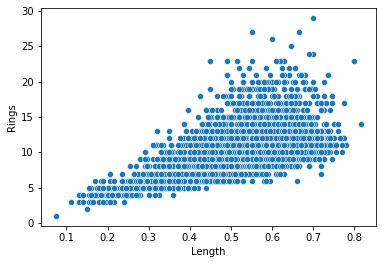

In [37]:
sns.scatterplot(x='Length',y='Rings',data=df)

In [38]:
# Length is positive correlated to Rings, As Length increases, Rings increases

<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

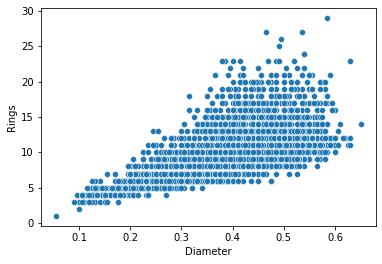

In [39]:
sns.scatterplot(x='Diameter',y='Rings',data=df)

In [40]:
# Diameter is positive correlated to the Rings, As Diameter increases, Rings increases

<AxesSubplot:xlabel='Height', ylabel='Rings'>

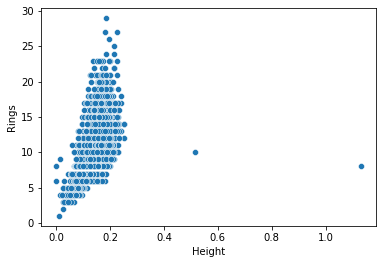

In [41]:
sns.scatterplot(x='Height',y='Rings',data=df)

In [42]:
# As Height increases, Rings increases. This feature have some outliers as well
# Abalone Height increases very less , they are samll creature

<AxesSubplot:xlabel='Whole weight', ylabel='Rings'>

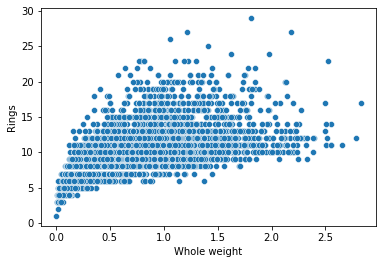

In [43]:
sns.scatterplot(x='Whole weight',y='Rings',data=df)

In [44]:
# Whole weight is directly proportional to Rings

<AxesSubplot:xlabel='Shucked weight', ylabel='Rings'>

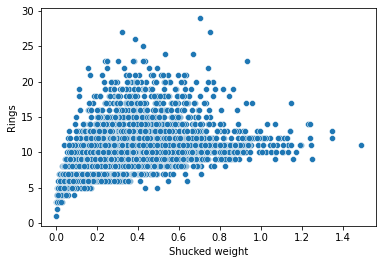

In [45]:
sns.scatterplot(x='Shucked weight',y='Rings',data=df)

In [46]:
# Shucked weight is also directly proportional to Rings, positive corelated

<AxesSubplot:xlabel='Viscera weight', ylabel='Rings'>

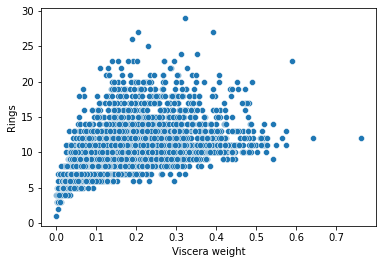

In [47]:
sns.scatterplot(x='Viscera weight',y='Rings',data=df)

In [48]:
# Viscera weight is directly proportional to Rings

<AxesSubplot:xlabel='Shell weight', ylabel='Rings'>

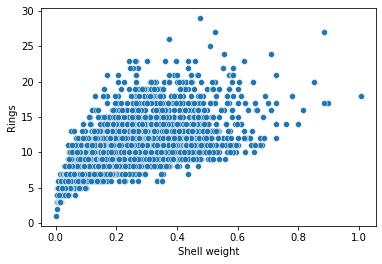

In [49]:
sns.scatterplot(x='Shell weight',y='Rings',data=df)

In [50]:
# Shall weight is also positive correlated to Rings.


In [51]:
# Mostly features are positive correlated to the Target variable. Lets find out how Much.


<AxesSubplot:>

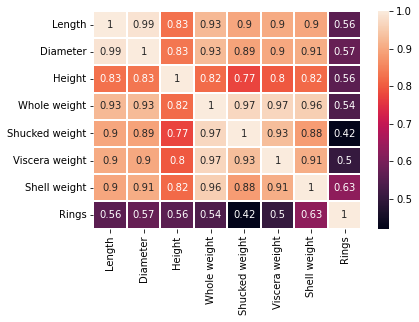

In [52]:
sns.heatmap(df.corr(), annot=True, linecolor='white',linewidths=.25)

In [53]:
# Length and Diameter have high correlation amoung them  .99
# Whole weight and Shucked weight have high correlation   .97
#Shucked Weight and Viscera Weight also have good correlation .93
# Viscera weight and Shell weight have high correlation   .91


# This data have Multi Collinearity problem.

Check VIF first because a VIF value less than 10 is acceptable and above 10 should be removed from the data, but if you have two or more factors with a higher VIF, remove one from the model. Always remove the parameter that haS the highest VIF value. Then check the VIF value again and if the VIF value is more than 10 then follow the same process again.

In [54]:
int_column= df.drop('Sex', axis=1)
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_data=scaler.fit_transform(int_column)

In [55]:
scaled_data = pd.DataFrame(scaled_data)
scaled_data.columns= int_column.columns

In [56]:
scaled_data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013
...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0.330765
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,0.020571
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,-0.289624
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0.020571


In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
vif=pd.DataFrame()
vif['VIF Factor']= [variance_inflation_factor(scaled_data.values,i) for i in range(scaled_data.shape[1])]
vif['Features']= scaled_data.columns

In [59]:
vif

,VIF Factor,Features
0,40.779070,Length
1,42.203488,Diameter
2,3.609767,Height
3,113.780726,Whole weight
4,32.452813,Shucked weight
5,17.582701,Viscera weight
6,21.548538,Shell weight
7,2.116984,Rings


In [60]:
# We have to drop Whole weight feature because this is being113% explained by other features.


In [61]:
scaled_data.drop('Whole weight', axis=1, inplace=True)


In [62]:
scaled_data

,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.215968,-1.287337,-1.320757,-0.910013
...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.047908,0.532900,0.073062,0.330765
4173,0.549706,0.323686,-0.107991,0.358808,0.309362,0.155685,0.020571
4174,0.632985,0.676409,1.565767,0.748559,0.975413,0.496955,-0.289624
4175,0.841182,0.777187,0.250672,0.773341,0.733627,0.410739,0.020571


In [63]:
vif=pd.DataFrame()
vif['VIF Factor']= [variance_inflation_factor(scaled_data.values,i) for i in range(scaled_data.shape[1])]
vif['Features']= scaled_data.columns
vif

,VIF Factor,Features
0,40.774078,Length
1,42.201680,Diameter
2,3.609743,Height
3,10.151526,Shucked weight
4,10.698085,Viscera weight
5,9.335843,Shell weight
6,2.039064,Rings


In [64]:
# Still VIF is large for DIamater column
scaled_data.drop('Diameter', axis=1, inplace=True)

In [65]:
scaled_data

,Length,Height,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.574558,-1.064424,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.183978,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,-0.107991,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.347099,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.423087,-1.215968,-1.287337,-1.320757,-0.910013
...,...,...,...,...,...,...
4172,0.341509,0.609334,0.047908,0.532900,0.073062,0.330765
4173,0.549706,-0.107991,0.358808,0.309362,0.155685,0.020571
4174,0.632985,1.565767,0.748559,0.975413,0.496955,-0.289624
4175,0.841182,0.250672,0.773341,0.733627,0.410739,0.020571


In [66]:
vif=pd.DataFrame()
vif['VIF Factor']= [variance_inflation_factor(scaled_data.values,i) for i in range(scaled_data.shape[1])]
vif['Features']= scaled_data.columns
vif

,VIF Factor,Features
0,8.211232,Length
1,3.570701,Height
2,10.135891,Shucked weight
3,10.690590,Viscera weight
4,9.105357,Shell weight
5,2.020610,Rings


In [67]:
# Looks good now after removing 2 columns having high multicolinearity


In [68]:
#Lets remove the column from the df
df.drop(['Whole weight','Diameter'], axis=1,inplace=True)

In [69]:
df

,Sex,Length,Height,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.095,0.2245,0.1010,0.1500,15
1,M,0.350,0.090,0.0995,0.0485,0.0700,7
2,F,0.530,0.135,0.2565,0.1415,0.2100,9
3,M,0.440,0.125,0.2155,0.1140,0.1550,10
4,I,0.330,0.080,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,F,0.565,0.165,0.3700,0.2390,0.2490,11
4173,M,0.590,0.135,0.4390,0.2145,0.2605,10
4174,M,0.600,0.205,0.5255,0.2875,0.3080,9
4175,F,0.625,0.150,0.5310,0.2610,0.2960,10


# Seprate Dependent and independent variable

In [70]:
X= df.drop('Rings', axis=1)
Y= df.iloc[:,-1]

In [71]:
num_col= X.drop('Sex', axis=1)
cat_col=pd.DataFrame(X['Sex'])

# Outliers()

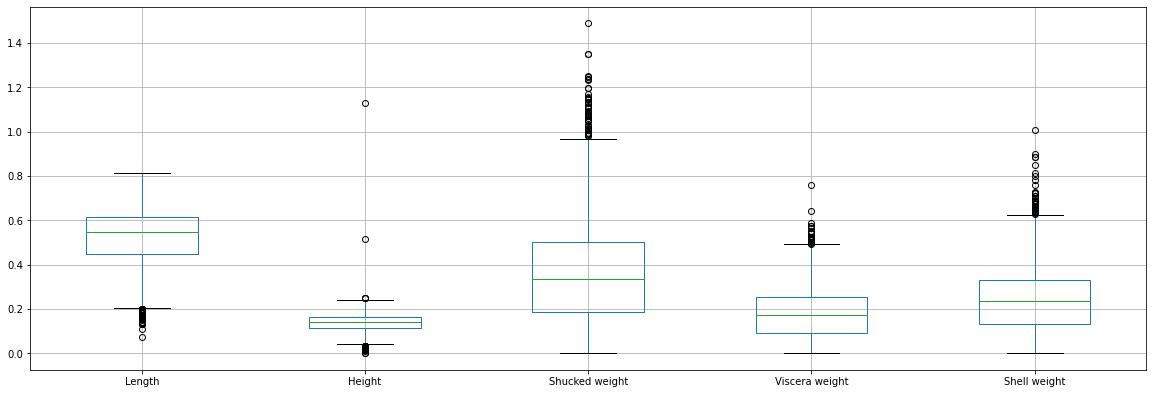

In [72]:
num_col.boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=.25)
plt.show()

In [73]:
# All columns have outliers, Lets handle

for i in num_col:
    low=num_col[i].quantile(.10)
    high=num_col[i].quantile(.90)
    num_col[i]=np.where(num_col[i]>high,high,num_col[i])
    num_col[i]=np.where(num_col[i]<low,low,num_col[i])

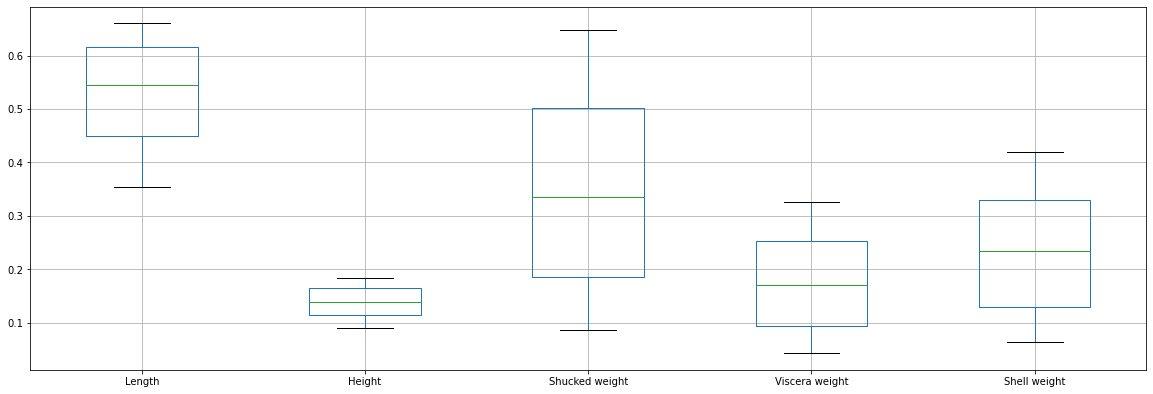

In [74]:
# BoxPlot after outlier handle

num_col.boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=.25)
plt.show()

In [75]:
num_col.head()

,Length,Height,Shucked weight,Viscera weight,Shell weight
0,0.455,0.095,0.2245,0.1010,0.150
1,0.355,0.090,0.0995,0.0485,0.070
2,0.530,0.135,0.2565,0.1415,0.210
3,0.440,0.125,0.2155,0.1140,0.155
4,0.355,0.090,0.0895,0.0433,0.065


In [76]:
num_col.skew()

Length           -0.364967
Height           -0.155393
Shucked weight    0.163149
Viscera weight    0.154531
Shell weight      0.108362
dtype: float64

# Transformation

In [77]:
from sklearn.preprocessing import power_transform
num_col_scaled=power_transform(num_col,method='yeo-johnson')

In [78]:
num_col_scaled= pd.DataFrame(num_col_scaled)
num_col_scaled.columns= num_col.columns

In [79]:
num_col_scaled.skew()

Length           -0.119020
Height           -0.049185
Shucked weight    0.002550
Viscera weight    0.017127
Shell weight     -0.000160
dtype: float64

# Standardization()

In [80]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
num_col_scaled_transformed=sc.fit_transform(num_col_scaled)

In [81]:
num_col_scaled_transformed= pd.DataFrame(num_col_scaled_transformed)
num_col_scaled_transformed.columns= num_col_scaled.columns

In [82]:
num_col_scaled_transformed

,Length,Height,Shucked weight,Viscera weight,Shell weight
0,-0.796143,-1.379333,-0.630116,-0.780687,-0.687753
1,-1.579792,-1.517711,-1.417267,-1.426560,-1.448672
2,-0.081397,-0.194538,-0.442085,-0.313625,-0.150900
3,-0.925454,-0.504016,-0.683925,-0.627953,-0.641962
4,-1.579792,-1.517711,-1.484232,-1.493212,-1.498094
...,...,...,...,...,...
4172,0.293566,0.789610,0.186683,0.713994,0.184018
4173,0.578627,-0.194538,0.542873,0.467621,0.280789
4174,0.696807,1.494039,0.965008,1.180509,0.671393
4175,1.002948,0.286913,0.990998,0.928992,0.574065


# Encoding of Categorical Value

In [83]:
cat_col.head()  # This is Nominal category so we can use getdummy method

,Sex
0,M
1,M
2,F
3,M
4,I


In [84]:
cat_col['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [85]:
# Male, Female, Infant

In [88]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [90]:
cat_col=le.fit_transform(cat_col)

In [94]:
cat_col=pd.DataFrame(cat_col)


In [95]:
cat_col

,0
0,2
1,2
2,0
3,2
4,1
...,...
4172,0
4173,2
4174,2
4175,0


In [98]:
# Lets Join independent columns
X= pd.concat([cat_col,num_col_scaled_transformed], axis=1)

In [99]:
X

,0,Length,Height,Shucked weight,Viscera weight,Shell weight
0,2,-0.796143,-1.379333,-0.630116,-0.780687,-0.687753
1,2,-1.579792,-1.517711,-1.417267,-1.426560,-1.448672
2,0,-0.081397,-0.194538,-0.442085,-0.313625,-0.150900
3,2,-0.925454,-0.504016,-0.683925,-0.627953,-0.641962
4,1,-1.579792,-1.517711,-1.484232,-1.493212,-1.498094
...,...,...,...,...,...,...
4172,0,0.293566,0.789610,0.186683,0.713994,0.184018
4173,2,0.578627,-0.194538,0.542873,0.467621,0.280789
4174,2,0.696807,1.494039,0.965008,1.180509,0.671393
4175,0,1.002948,0.286913,0.990998,0.928992,0.574065


In [102]:
Y= pd.DataFrame(Y)
Y

,Rings
0,15
1,7
2,9
3,10
4,7
...,...
4172,11
4173,10
4174,9
4175,10


# Train Test Split

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [104]:
#Try to find best Random_state no.
LR_model= LinearRegression()

In [112]:
for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=i,test_size=.20)
    LR_model.fit(x_train,y_train)
    pred_train=LR_model.predict(x_train)
    pred_test=LR_model.predict(x_test)
    if round(r2_score(y_test,pred_test),2) == round(r2_score(y_train,pred_train),2):
        print("At random state ", i, "The model performance very well")
        print("At random state: ",i)
        print("Test R2 score is: ", round(r2_score(y_test,pred_test),2))
        print('Train R2 score is: ', round(r2_score(y_train,pred_train),2))
        print('X'*50,'\n')
    

At random state  48 The model performance very well
At random state:  48
Test R2 score is:  0.47
Train R2 score is:  0.47
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  72 The model performance very well
At random state:  72
Test R2 score is:  0.47
Train R2 score is:  0.47
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  107 The model performance very well
At random state:  107
Test R2 score is:  0.47
Train R2 score is:  0.47
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  180 The model performance very well
At random state:  180
Test R2 score is:  0.47
Train R2 score is:  0.47
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 



In [113]:
# Random_State = 48

In [114]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=48,test_size=.20)
LR_model.fit(x_train,y_train)

LinearRegression()

In [123]:
print(f'mean_absolute_error of LR model: {mean_absolute_error(y_test,LR_model.predict(x_test))}')
print(f'mean_square of LR model: {mean_squared_error(y_test,LR_model.predict(x_test))}')
print(f'R2 Score of LR model: {r2_score(y_test,LR_model.predict(x_test) )} ')

mean_absolute_error of LR model: 1.595385553131122
mean_square of LR model: 4.613602135161408
R2 Score of LR model: 0.4746896285900716 


In [116]:
# Other Algorithms

In [117]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [119]:
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
XGB_model= XGBRegressor()


model=[RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model ]

In [121]:
for m in model:
    m.fit(x_train,y_train)
    print('mean_absolute_error of ',m ,'model', mean_absolute_error(y_test,m.predict(x_test)))
    print('mean_square_error of',m,'model' , mean_squared_error(y_test,m.predict(x_test)))
    print('R2 Score of',m,'model', r2_score(y_test,m.predict(x_test) ))
    print('X' * 50, '\n\n')
    

mean_absolute_error of  Ridge() model 1.5949385288927898
mean_square_error of Ridge() model 4.612109007653872
R2 Score of Ridge() model 0.47485963791089447
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Lasso() model 1.8448404055177157
mean_square_error of Lasso() model 6.0668361536405
R2 Score of Lasso() model 0.30922262913323895
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  DecisionTreeRegressor() model 2.0931811730628462
mean_square_error of DecisionTreeRegressor() model 8.922548327326572
R2 Score of DecisionTreeRegressor() model -0.0159322452253412
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  SVR() model 1.4185628190452884
mean_square_error of SVR() model 4.18234260650518
R2 Score of SVR() model 0.523793365005901
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  KNeighborsRegressor() model 1.5122009569377988
mean_square_error of KNeighborsRegressor() model 4.3

# Support Vector Regressor performed well 

In [127]:
# Lets check cross validation

from sklearn.model_selection import cross_val_score
scr= cross_val_score(LR_model,X,Y,cv=5, scoring='neg_mean_squared_error')

print(f'mean_square of LR model: {mean_squared_error(y_test,LR_model.predict(x_test))}')
print("cross Validation score of Logistic Regression is ",scr.mean())

mean_square of LR model: 4.613602135161408
cross Validation score of Logistic Regression is  -5.890618150876956


In [128]:
model

[Ridge(),
 Lasso(),
 DecisionTreeRegressor(),
 SVR(),
 KNeighborsRegressor(),
 RandomForestRegressor(),
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)]

In [132]:
for i in model:
    print('mean_square of ',i, 'model',mean_squared_error(y_test,i.predict(x_test)))
    print("cross Validation score of ",i ," is ",cross_val_score(i,X,Y,cv=5, scoring='neg_mean_squared_error').mean())
    print('*'*50)

mean_square of  Ridge() model 4.612109007653872
cross Validation score of  Ridge()  is  -5.891487277022275
**************************************************
mean_square of  Lasso() model 6.0668361536405
cross Validation score of  Lasso()  is  -8.072823846036076
**************************************************
mean_square of  DecisionTreeRegressor() model 8.922548327326572
cross Validation score of  DecisionTreeRegressor()  is  -10.045288415292264
**************************************************
mean_square of  SVR() model 4.18234260650518
cross Validation score of  SVR()  is  -5.6790941444333916
**************************************************
mean_square of  KNeighborsRegressor() model 4.390382775119618
cross Validation score of  KNeighborsRegressor()  is  -6.854721680084806
**************************************************
mean_square of  RandomForestRegressor() model 4.522021512680586
cross Validation score of  RandomForestRegressor()  is  -5.719954977928684
****************

# Hyper Parameter Tuning of SVR

In [143]:
from sklearn.model_selection import GridSearchCV

# creating parameter list to pass in GridsearchCV

parameters= [{ 'kernal':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
             'gamma':['scale','auto'], 'C':[1,10,20,30,40,50,60,70,80,90,100] }]

In [144]:
GCV= GridSearchCV(SV_model,parameters,cv=5,scoring='neg_mean_squared_error')
GCV.fit(x_train,y_train)  # Fitting data inot model
GCV.best_params_    #Printing the best parameters found by GridSearchCV

ValueError: Invalid parameter kernal for estimator SVR(C=1). Check the list of available parameters with `estimator.get_params().keys()`.